In [1]:
library(psych) #because of userfriendly use of varimax

Warning message:
"package 'psych' was built under R version 4.0.5"


# Download data

In [2]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_'
path_adapt = file.path(path_,'Adaptability')
path_model = file.path(path_adapt,'repeatability_model')
df = read.csv(file.path(path_adapt,'df_MVT_4individuality.csv'), header = TRUE, sep = ";")
df$HenID = as.factor(df$HenID)   
df$PenID = as.factor(df$PenID) 
df$WIB = as.factor(df$WIB) 
df$TrackingSystemID = as.factor(df$TrackingSystemID) 
#mean-centering of the environmental variable so that intercepts reflect average values for the population and individuals
df$cDIB = as.integer(df$DIB) 
df$cDIBfact = as.factor(df$cDIB) 
df$RearingPenID = as.factor(df$RearingPenID) 
df$InitialWeight_kg = df$InitialWeight/1000
df$CLASS = as.factor(df$CLASS) 
df$Treatment = as.factor(df$Treatment) 
print(dim(df))
summary(df)

[1] 5259   29


 WIB         HenID           RPen            DIB          CLASS     
 2:328   hen_1  :  43   Min.   :1.000   Min.   :11.00   LEXP :1043  
 3:777   hen_105:  43   1st Qu.:2.000   1st Qu.:23.00   MEXP :1421  
 4:874   hen_110:  43   Median :2.000   Median :34.00   Other:2795  
 5:910   hen_113:  43   Mean   :2.479   Mean   :33.58               
 6:814   hen_114:  43   3rd Qu.:3.000   3rd Qu.:44.00               
 7:910   hen_116:  43   Max.   :4.000   Max.   :54.00               
 8:646   (Other):5001                                               
             TrackingSystemID     PenID      temperature_C_avg Treatment  
 TrackingSystem 10-12:2138    pen10  : 756   Min.   : 4.000    OFH :2569  
 TrackingSystem 3-5  :1746    pen11  : 756   1st Qu.: 8.667    TRAN:2690  
 TrackingSystem 8-9  :1375    pen8   : 688   Median :11.000               
                              pen9   : 687   Mean   :10.841               
                              pen12  : 626   3rd Qu.:12.667              

# PCA

In [3]:
#define var
li_pca = c('perc_duration_5_Zone', 'perc_duration_4_Zone','perc_duration_3_Zone', 'perc_duration_2_Zone','perc_1_Zone_while_WG_open',
          'nbr_stays_2_Zone_perh', 'nbr_stays_4_Zone_perh','nbr_stays_3_Zone_perh', 'nbr_stays_5_Zone_perh','nbr_stays_1_Zone_perh',
          'in_WG_15mnAfterOpening', 'SleepingHeight','vertical_travel_distance_perh')
#df[li_pca] = scale(df[li_pca], center=TRUE, scale=TRUE) #x-mean / sd

In [4]:
#first obs per week per individual
df_pca = df[df$tobeusedPCA==1,][li_pca]
head(df_pca,3)

,perc_duration_5_Zone,perc_duration_4_Zone,perc_duration_3_Zone,perc_duration_2_Zone,perc_1_Zone_while_WG_open,nbr_stays_2_Zone_perh,nbr_stays_4_Zone_perh,nbr_stays_3_Zone_perh,nbr_stays_5_Zone_perh,nbr_stays_1_Zone_perh,in_WG_15mnAfterOpening,SleepingHeight,vertical_travel_distance_perh
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,1,2,40,57,0.000000,0.900000,0.4000000,1.000000,0.3,0.0000000,0,3,2.500000
4,36,1,15,47,0.000000,0.700000,0.1000000,0.700000,0.2,0.0000000,0,3,1.800000
10,0,8,31,59,3.264706,1.272727,0.6363636,1.727273,0.0,0.3529412,0,2,3.363636


In [5]:
#https://www.rdocumentation.org/packages/psych/versions/2.1.9/topics/principal
res = psych::principal(df_pca, rotate="none", nfactors=3, scores=TRUE) #not varimax (we want PC, and only one)
res

Principal Components Analysis
Call: psych::principal(r = df_pca, nfactors = 3, rotate = "none", scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
                                PC1   PC2   PC3   h2    u2 com
perc_duration_5_Zone          -0.88  0.13  0.31 0.90 0.104 1.3
perc_duration_4_Zone           0.22  0.61  0.05 0.42 0.577 1.3
perc_duration_3_Zone           0.73 -0.19 -0.30 0.65 0.346 1.5
perc_duration_2_Zone           0.70 -0.26 -0.44 0.75 0.254 2.0
perc_1_Zone_while_WG_open      0.46 -0.38  0.69 0.83 0.173 2.4
nbr_stays_2_Zone_perh          0.92 -0.23  0.00 0.89 0.109 1.1
nbr_stays_4_Zone_perh          0.44  0.82  0.19 0.91 0.093 1.7
nbr_stays_3_Zone_perh          0.93  0.17 -0.16 0.91 0.090 1.1
nbr_stays_5_Zone_perh          0.20  0.79  0.33 0.78 0.222 1.5
nbr_stays_1_Zone_perh          0.55 -0.38  0.65 0.86 0.143 2.6
in_WG_15mnAfterOpening         0.42 -0.31  0.52 0.54 0.456 2.6
SleepingHeight                -0.31  0.11  0.31 0.20 0.795 2.2
v

In [6]:
#https://www.rdocumentation.org/packages/psych/versions/2.1.9/topics/principal
res = psych::principal(df_pca, rotate="none", nfactors=3, scores=TRUE) #not varimax (we want PC, and only one)
res

Principal Components Analysis
Call: psych::principal(r = df_pca, nfactors = 3, rotate = "none", scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
                                PC1   PC2   PC3   h2    u2 com
perc_duration_5_Zone          -0.88  0.13  0.31 0.90 0.104 1.3
perc_duration_4_Zone           0.22  0.61  0.05 0.42 0.577 1.3
perc_duration_3_Zone           0.73 -0.19 -0.30 0.65 0.346 1.5
perc_duration_2_Zone           0.70 -0.26 -0.44 0.75 0.254 2.0
perc_1_Zone_while_WG_open      0.46 -0.38  0.69 0.83 0.173 2.4
nbr_stays_2_Zone_perh          0.92 -0.23  0.00 0.89 0.109 1.1
nbr_stays_4_Zone_perh          0.44  0.82  0.19 0.91 0.093 1.7
nbr_stays_3_Zone_perh          0.93  0.17 -0.16 0.91 0.090 1.1
nbr_stays_5_Zone_perh          0.20  0.79  0.33 0.78 0.222 1.5
nbr_stays_1_Zone_perh          0.55 -0.38  0.65 0.86 0.143 2.6
in_WG_15mnAfterOpening         0.42 -0.31  0.52 0.54 0.456 2.6
SleepingHeight                -0.31  0.11  0.31 0.20 0.795 2.2
v

In [7]:
#for validity compare with the one run on full dataset
res_validity = psych::principal(df[li_pca], rotate="none", nfactors=3, scores=TRUE) #not varimax (we want PC, and only one)
res_validity

Principal Components Analysis
Call: psych::principal(r = df[li_pca], nfactors = 3, rotate = "none", 
    scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
                                PC1   PC2   PC3   h2    u2 com
perc_duration_5_Zone          -0.89  0.20  0.26 0.90 0.103 1.3
perc_duration_4_Zone           0.17  0.64 -0.05 0.44 0.558 1.2
perc_duration_3_Zone           0.71 -0.28 -0.27 0.66 0.343 1.6
perc_duration_2_Zone           0.71 -0.32 -0.38 0.75 0.253 2.0
perc_1_Zone_while_WG_open      0.42 -0.20  0.76 0.80 0.204 1.7
nbr_stays_2_Zone_perh          0.91 -0.20  0.04 0.88 0.122 1.1
nbr_stays_4_Zone_perh          0.38  0.87  0.05 0.89 0.106 1.4
nbr_stays_3_Zone_perh          0.92  0.16 -0.19 0.90 0.097 1.2
nbr_stays_5_Zone_perh          0.13  0.85  0.20 0.79 0.213 1.2
nbr_stays_1_Zone_perh          0.53 -0.20  0.71 0.82 0.177 2.1
in_WG_15mnAfterOpening         0.41 -0.15  0.62 0.58 0.425 1.9
SleepingHeight                -0.33  0.09  0.29 0.20 0.

In [8]:
#documentation: The beta weights to find the principal components from the data
res$weights

,PC1,PC2,PC3
perc_duration_5_Zone,-0.16702842,0.05244521,0.172851593
perc_duration_4_Zone,0.04128454,0.24779898,0.028957920
perc_duration_3_Zone,0.13705110,-0.07830545,-0.166842724
perc_duration_2_Zone,0.13167155,-0.10593407,-0.242959054
perc_1_Zone_while_WG_open,0.08720325,-0.15427330,0.380120225
nbr_stays_2_Zone_perh,0.17312370,-0.09153064,-0.001061953
nbr_stays_4_Zone_perh,0.08346418,0.33323273,0.108022012
nbr_stays_3_Zone_perh,0.17472716,0.06974758,-0.086477802
nbr_stays_5_Zone_perh,0.03833958,0.32223617,0.181171275
nbr_stays_1_Zone_perh,0.10331834,-0.15229639,0.358424708


In [9]:
#eigenvalues of all components --> first one >1
res$values

[1] 5.2953835100 2.4632001587 1.8023777644 0.8993479267 0.8250952308
 [6] 0.5917491471 0.4750124352 0.2862512180 0.1850579910 0.1519409772
[11] 0.0130472384 0.0113241289 0.0002122738

In [10]:
#https://www.rdocumentation.org/packages/psych/versions/2.1.6/topics/predict.psych
df_result = data.frame(predict(res, df[li_pca]))
df$PC1 = df_result$PC1
head(df,3)

,WIB,HenID,RPen,DIB,CLASS,TrackingSystemID,PenID,temperature_C_avg,Treatment,tobeusedPCA,...,nbr_stays_3_Zone_perh,nbr_stays_5_Zone_perh,nbr_stays_1_Zone_perh,in_WG_15mnAfterOpening,SleepingHeight,vertical_travel_distance_perh,cDIB,cDIBfact,InitialWeight_kg,PC1
,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<int>,...,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<fct>,<dbl>,<dbl>
1,2,hen_131,4,11,Other,TrackingSystem 10-12,pen10,11.50000,TRAN,1,...,1.0,0.3,0,0,3,2.5,11,11,1.202,0.08344469
2,2,hen_131,4,12,Other,TrackingSystem 10-12,pen10,10.16667,TRAN,0,...,1.0,0.1,0,0,3,2.1,12,12,1.202,-0.01901373
3,2,hen_131,4,13,Other,TrackingSystem 10-12,pen10,9.00000,TRAN,0,...,0.8,0.4,0,0,1,2.4,13,13,1.202,-0.33113438


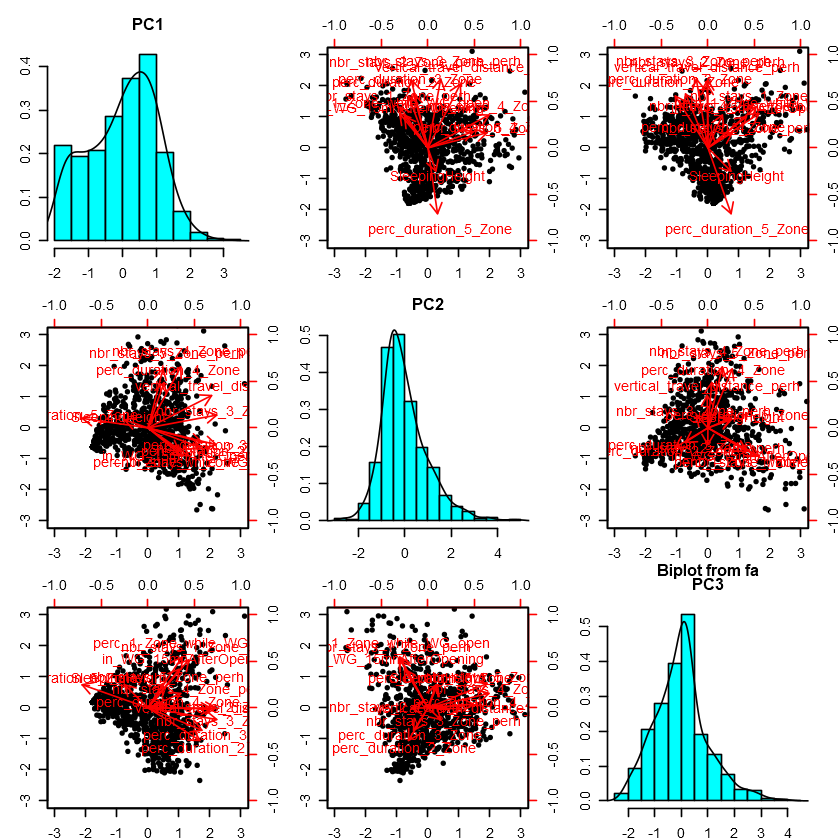

In [11]:
#documentation: https://www.rdocumentation.org/packages/psych/versions/2.0.9/topics/biplot.psych
biplot(res)

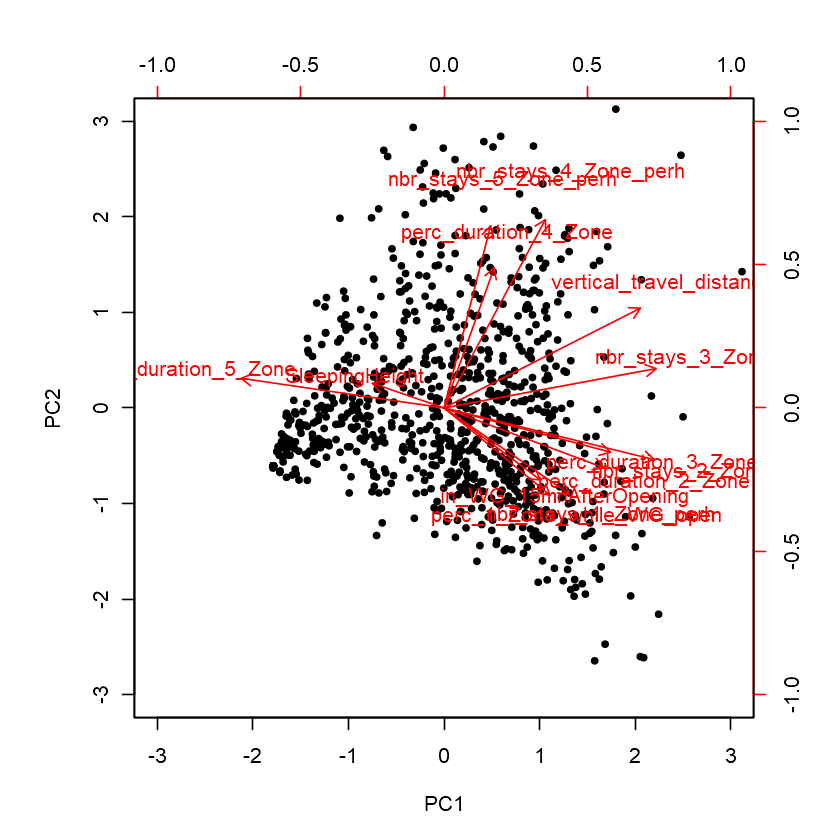

In [12]:
biplot(res, choose=c(1,2), main='')

In [13]:
jpeg("PCA.jpg")
biplot(res, choose=c(1,2), main='')
dev.off() 

png 
  2

In [14]:
write.csv(df, file.path(path_adapt,'df_MVT_4individuality_withPCA.csv'), row.names = FALSE)